<a href="https://colab.research.google.com/github/starl1ght0/hw_clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('weight-height.csv')

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

NameError: name 'data' is not defined

In [ ]:
data['Height'] = data['Height'] * 2.54
data['Weight'] = data['Weight'] * 0.453592

In [ ]:
male_df = data[data['Gender'] == 1]
female_df = data[data['Gender'] == 0]

In [ ]:
male_df

,Gender,Height,Weight
0,1,187.571423,109.720985
1,1,174.706036,73.622732
2,1,188.239668,96.497550
3,1,182.196685,99.809504
4,1,177.499761,93.598619
...,...,...,...
4995,1,174.904559,80.345228
4996,1,175.192494,72.250505
4997,1,170.215039,90.353440
4998,1,181.756605,84.325433


In [ ]:
male_stats = male_df.describe()
female_stats = female_df.describe()

In [ ]:
male_stats

,Gender,Height,Weight
count,5000.0,5000.000000,5000.000000
mean,1.0,175.326919,84.831057
std,0.0,7.272940,8.972573
min,1.0,148.353539,51.211870
25%,1.0,170.623685,78.874100
50%,1.0,175.330380,84.836920
75%,1.0,180.311409,90.880696
max,1.0,200.656806,122.465167


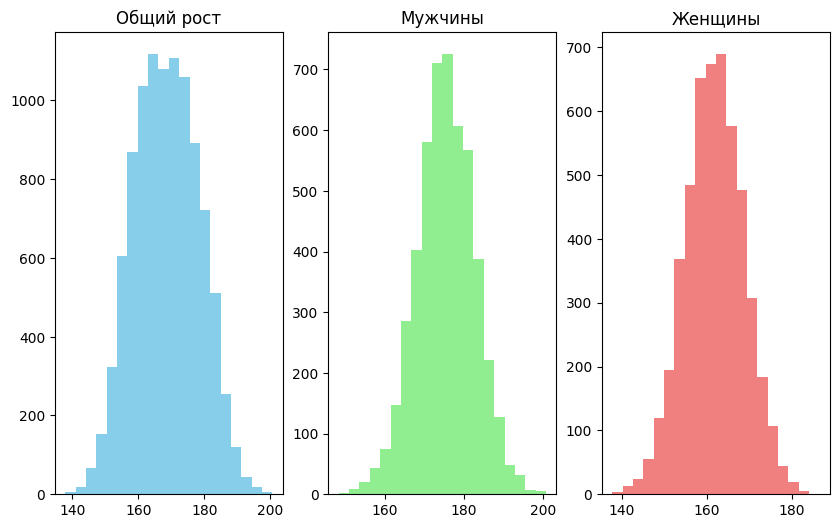

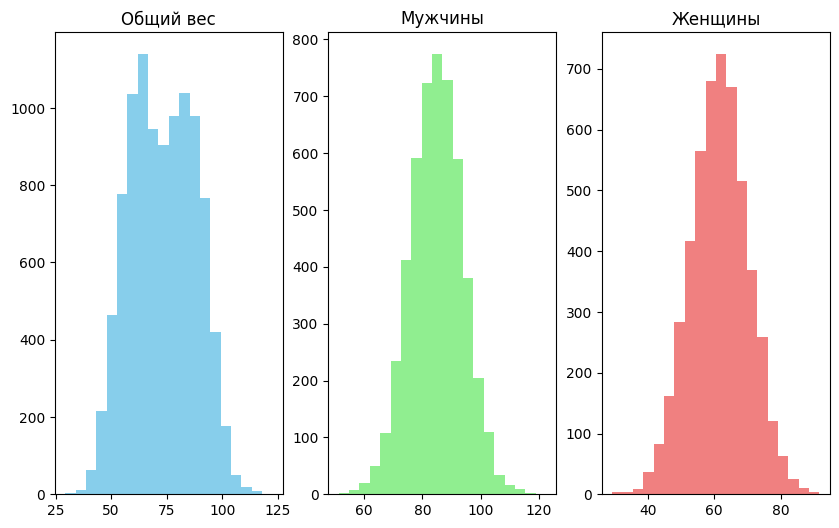

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(data['Height'], bins=20, color='skyblue')
plt.title('Общий рост')

plt.subplot(1, 3, 2)
plt.hist(male_df['Height'], bins=20, color='lightgreen')
plt.title('Мужчины')

plt.subplot(1, 3, 3)
plt.hist(female_df['Height'], bins=20, color='lightcoral')
plt.title('Женщины')

plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.hist(data['Weight'], bins=20, color='skyblue')
plt.title('Общий вес')

plt.subplot(1, 3, 2)
plt.hist(male_df['Weight'], bins=20, color='lightgreen')
plt.title('Мужчины')

plt.subplot(1, 3, 3)
plt.hist(female_df['Weight'], bins=20, color='lightcoral')
plt.title('Женщины')

plt.show()

In [ ]:
X = data.drop('Gender', axis=1)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
data['kmeans_cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
data['agg_cluster'] = agg_clustering.fit_predict(X)


In [ ]:
kmeans_score = silhouette_score(X, data['kmeans_cluster'])
agg_score = silhouette_score(X, data['agg_cluster'])

print(f'Точность работы модели k-средних: {kmeans_score}')
print(f'Точность работы модели иерархической кластеризации: {agg_score}')





Точность работы модели k-средних: 0.5707482129696564
Точность работы модели иерархической кластеризации: 0.5264617638310783
